In [3]:
! unzip "/content/archive.zip"

Archive:  /content/archive.zip
  inflating: Twitter_Data.csv        


In [4]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
! pip install nltk 

In [5]:
# read the csv file 
data = pd.read_csv('/content/Twitter_Data.csv')

In [6]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [7]:
data.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


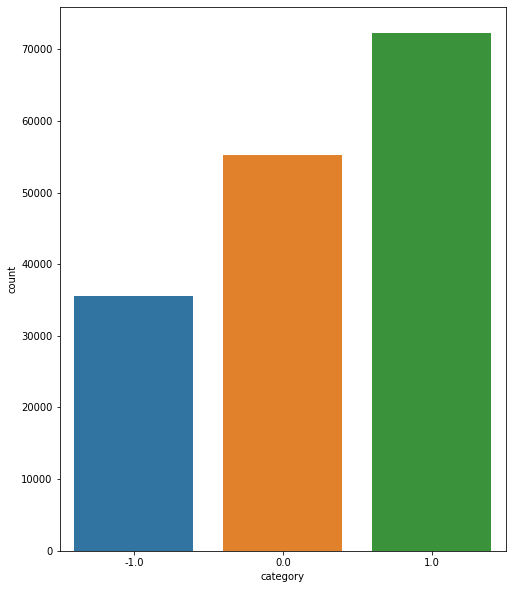

In [8]:
plt.figure(figsize=(8,10))
sns.countplot(x=data['category'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [10]:
# removing rows containing null values
data.drop(data[data['clean_text'].isna()].index, inplace=True)
data.drop(data[data['category'].isna()].index, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [12]:
# importing nltk library for text preprocessing
import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import re
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [13]:

lemm = WordNetLemmatizer()

In [14]:
# preprocessing the text
def preprocessing(line):
  tokens = []
  for token in line.split():
      tokens.append(lemm.lemmatize(token))
  return ' '.join(tokens)

In [15]:
data.clean_text = data.clean_text.apply(lambda x: preprocessing(x)) 

In [16]:
data['clean_text'][0]

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why doe take year get justice state should and not business and should exit psus and temple'

In [17]:
data['category'] = [2 if x == -1 else x for x in data['category']]

In [18]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,2.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp to...,1.0
3,asking his supporter prefix chowkidar their na...,1.0
4,answer who among these the most powerful world...,1.0


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [20]:
#tokenizer i.e vectorizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.clean_text)
word_index = tokenizer.word_index

In [21]:
vocab_size = len(word_index)+1

In [22]:
#padding the tokenized sequences to same length
from keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 200
lines = pad_sequences(tokenizer.texts_to_sequences(data.clean_text),
                        maxlen = MAX_SEQUENCE_LENGTH)

In [23]:
data.clean_text = lines.tolist()

In [24]:
data.head()


,clean_text,category
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0


In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label = LabelEncoder()

In [28]:
encodedy = label.fit(y=data['category'])

In [29]:
y = label.transform(data['category'])

In [30]:
from keras.utils import np_utils

In [31]:
dummy_y = np_utils.to_categorical(y)

In [32]:
dummy_y.shape

(162969, 3)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(data['clean_text'],data['category'],test_size=0.2,random_state=101)

In [35]:
import numpy as np
X_train = np.vstack(X_train.values)
y_train = np.vstack(y_train.values)

X_val = np.vstack(X_test.values)
y_val = np.vstack(y_test.values)

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense,Dropout

model = tf.keras.Sequential()

# Input layer
model.add(Input(shape=(None,)))

# Embedding layer
model.add(Embedding(input_dim=vocab_size,output_dim=200,trainable=True))

# LSTM layer
model.add(LSTM(64, activation='relu'))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         21612800  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                67840     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 21,684,995
Trainable params: 21,684,995
Non-trainable params: 0
_________________________________________________________________


In [45]:

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=2, batch_size=512,
                    verbose=1,shuffle=True,validation_data=(X_val,y_val))

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


255/255 [==============================] - 413s 2s/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.3053 - val_accuracy: 0.9263
Epoch 2/2
255/255 [==============================] - 412s 2s/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.2945 - val_accuracy: 0.9227


In [46]:
predictions = model.predict(X_val)

In [47]:
print(history.history)



{'loss': [0.047001127153635025, 0.038347069174051285], 'accuracy': [0.9846749901771545, 0.9879118204116821], 'val_loss': [0.30527713894844055, 0.29446566104888916], 'val_accuracy': [0.9263361096382141, 0.9227465391159058]}


In [48]:
print("Evaluate on test data")
results = model.evaluate(X_val, y_val, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
255/255 [==============================] - 35s 139ms/step - loss: 0.2945 - accuracy: 0.9227
test loss, test acc: [0.29446566104888916, 0.9227465391159058]


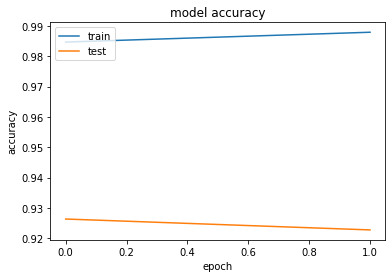

In [49]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

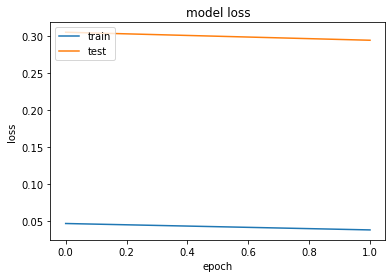

In [50]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()